Lesson 10-1
==

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)
X['class'] = y
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [3]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
X.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

<Axes: ylabel='Frequency'>

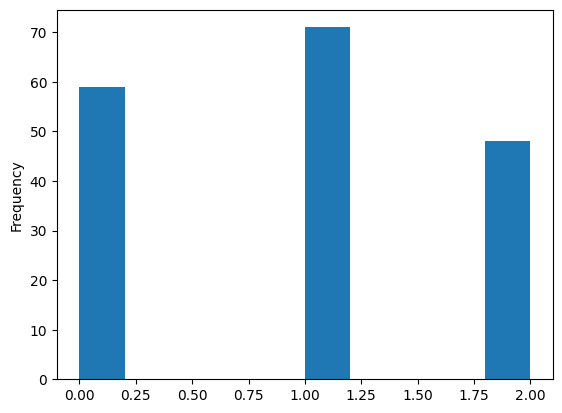

In [5]:
X['class'].plot.hist()

<Axes: xlabel='Frequency'>

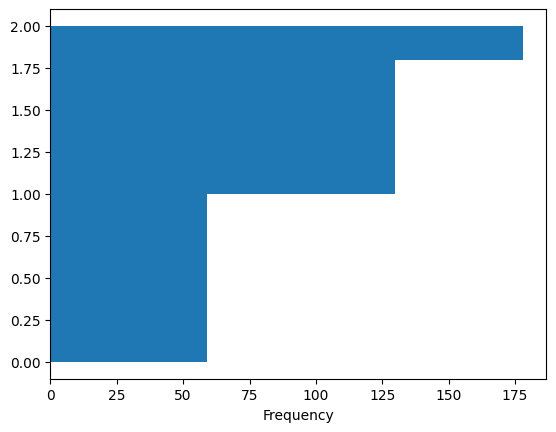

In [6]:
X['class'].plot.hist(orientation="horizontal", cumulative=True)

In [7]:
from collections import Counter

print(Counter(y))



Counter({1: 71, 0: 59, 2: 48})


<Axes: >

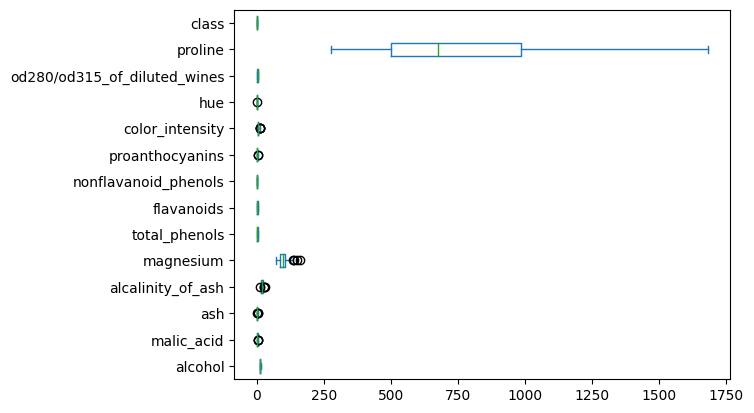

In [8]:
X.plot.box(vert=False)


<Axes: >

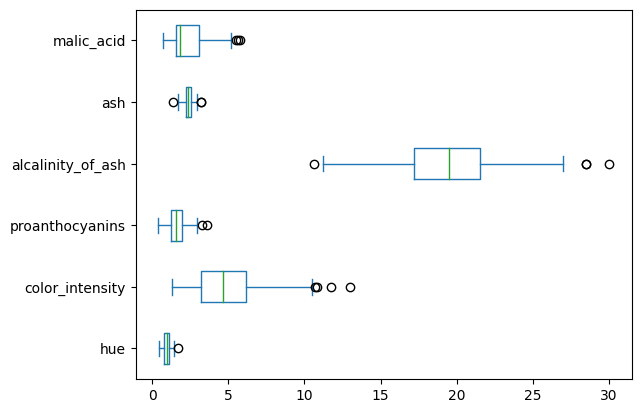

In [9]:
with_outliners = ['hue', 'color_intensity', 'proanthocyanins', 'alcalinity_of_ash', 'ash', 'malic_acid']  # , 'magnesium'
X[with_outliners].plot.box(vert=False)

<Axes: >

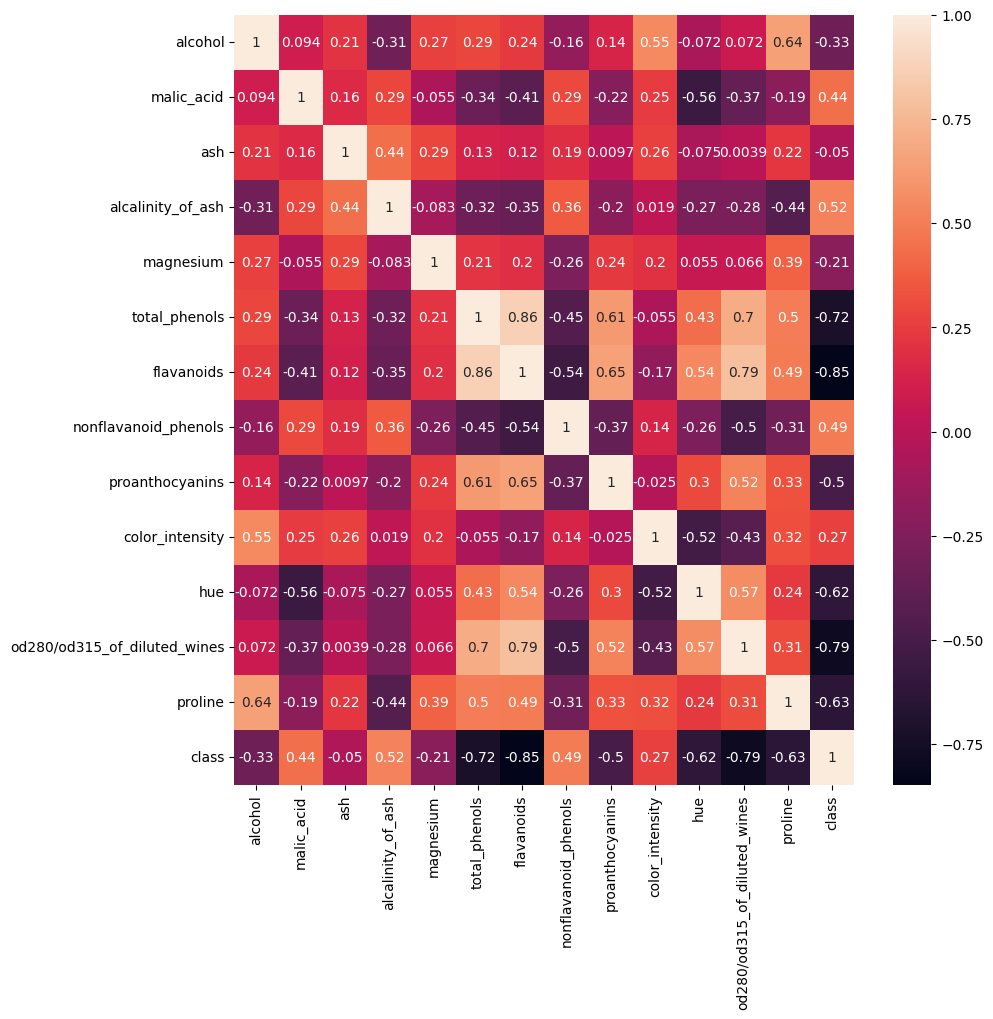

In [10]:
plt.figure(figsize=(10,10))
cmap=X.corr()
sns.heatmap(cmap, annot=True)



array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

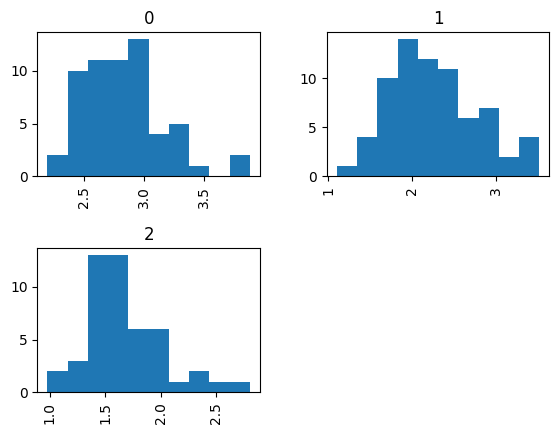

In [11]:
X['total_phenols'].hist(by=X['class'])

<Axes: xlabel='total_phenols', ylabel='flavanoids'>

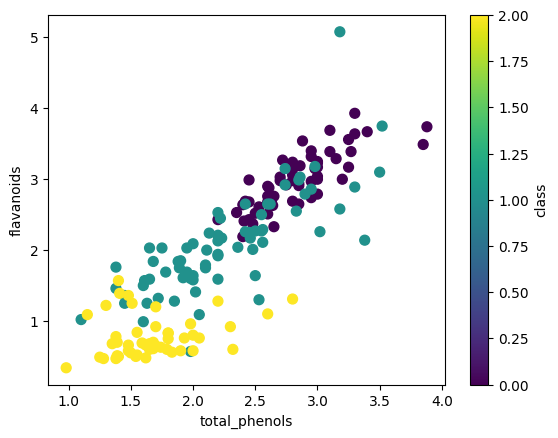

In [12]:
X.plot.scatter(x="total_phenols", y="flavanoids", c="class", s=50, colormap='viridis')




In [13]:
#Построим графики рассеяния для атрибутов с лучшей корреляцией.
good_corr = ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines', 'hue', 'proline', 'nonflavanoid_phenols', 'alcalinity_of_ash']

pairs = [(good_corr[i], good_corr[j]) for i in range(len(good_corr)) for j in range(i+1, len(good_corr))]

'''
non_repeated_pairs = []
seen_pairs = set()
for pair in pairs:
    reversed_pair = (pair[1], pair[0])  # Check both (a, b) and (b, a)
    if pair not in seen_pairs and reversed_pair not in seen_pairs:
        non_repeated_pairs.append(pair)
        seen_pairs.add(pair)

print(len(non_repeated_pairs))

'''

'\nnon_repeated_pairs = []\nseen_pairs = set()\nfor pair in pairs:\n    reversed_pair = (pair[1], pair[0])  # Check both (a, b) and (b, a)\n    if pair not in seen_pairs and reversed_pair not in seen_pairs:\n        non_repeated_pairs.append(pair)\n        seen_pairs.add(pair)\n\nprint(len(non_repeated_pairs))\n\n'

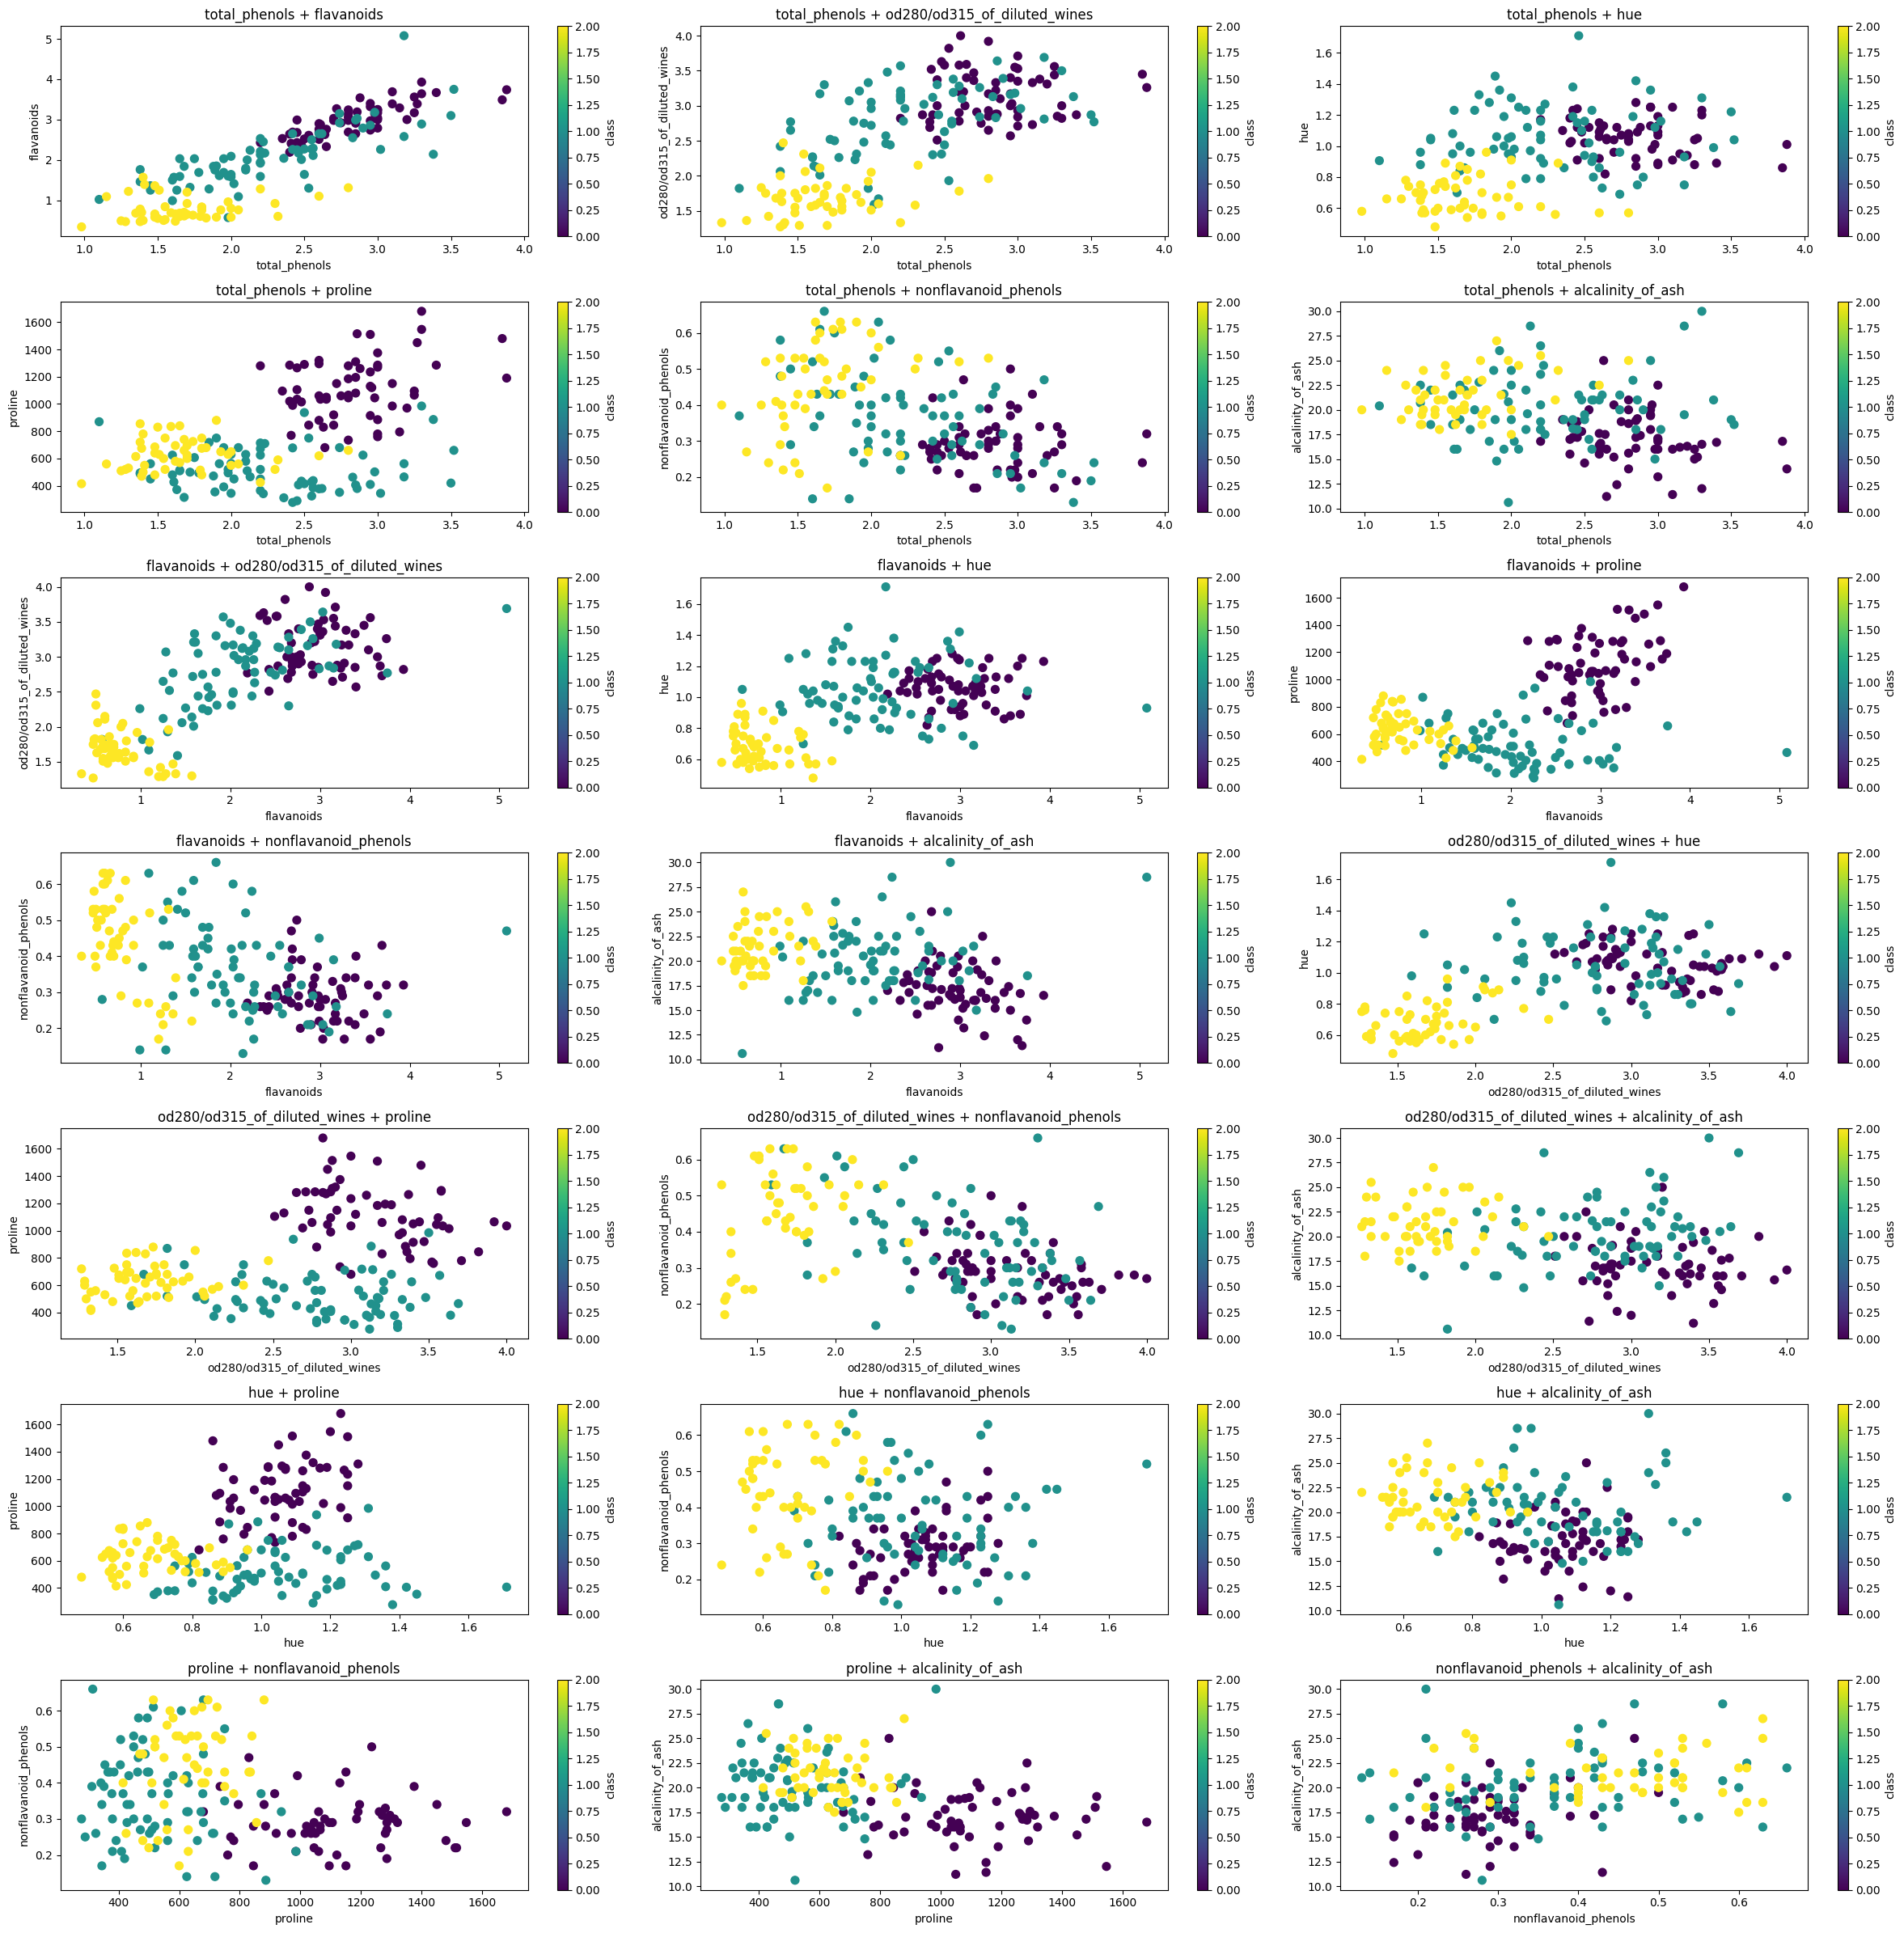

In [14]:
num_plots = len(pairs)
num_cols = 3
num_rows = num_plots//num_cols


fig,axs = plt.subplots(num_rows, num_cols, figsize=(24,24))
'''
if num_rows == 1 or num_cols == 1:
    axs = axs.flatten()
'''

axe = axs.ravel()

for i , pair in enumerate(pairs):
    X.plot.scatter(x = pair[0], y = pair[1], c='class', s=50, colormap = 'viridis', ax=axe[i])
    axe[i].set_title(f'{pair[0]} + {pair[1]}')
plt.tight_layout()
plt.show()

In [15]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


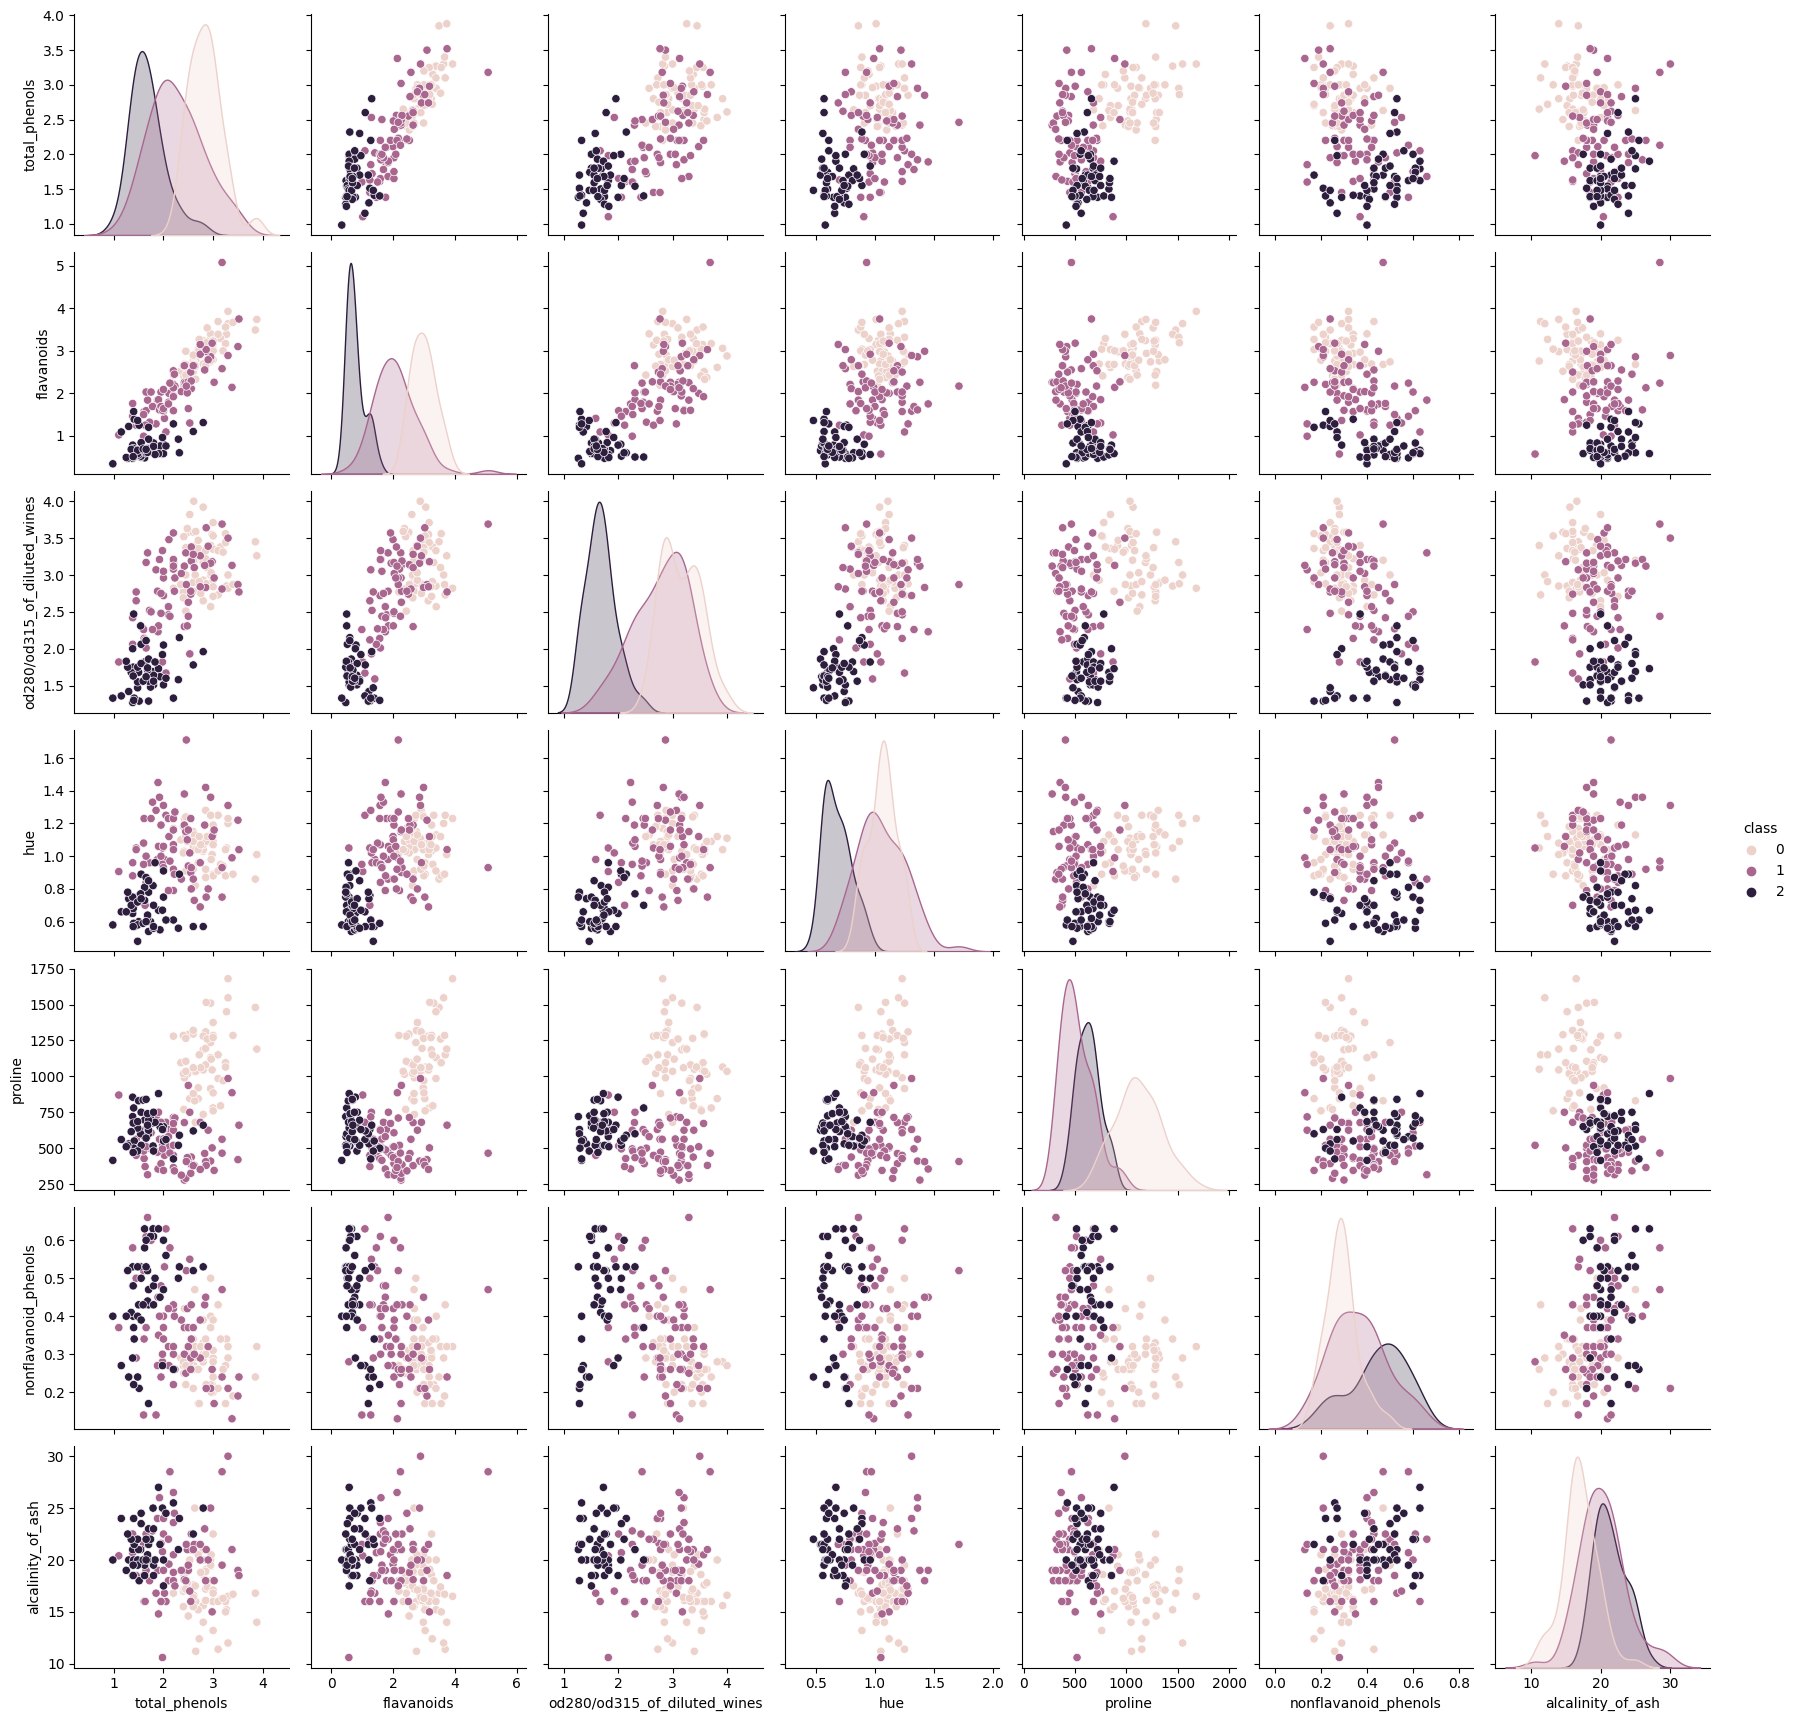

In [16]:
sns.pairplot(X[good_corr + ['class']], hue='class')

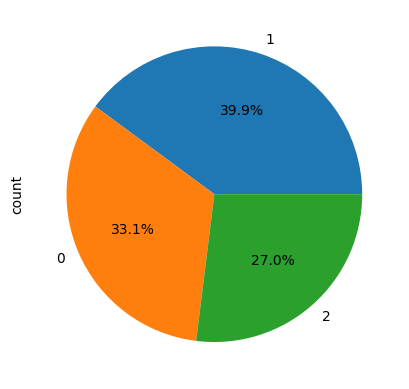

In [17]:
plt.figure()
X['class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

Lesson 10-2
==

```pip install pandas shapely fiona matplotlib pyproj```

```pip install geopandas```


```pip install geodatasets```

In [18]:
import geopandas as gpd
from shapely.geometry import Point


In [19]:
#пример
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Population': [8419600, 3990456, 2705994, 2325502]
}
df = pd.DataFrame(data)

geometry = [Point(-74.006, 40.7128),  # New York (longitude, latitude)
            Point(-118.2437, 34.0522),  # Los Angeles
            Point(-87.6298, 41.8781),  # Chicago
            Point(-95.3698, 29.7604)]  # Houston

gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326') #crs = coordinate reference system

print(gdf)


          City  Population                   geometry
0     New York     8419600    POINT (-74.006 40.7128)
1  Los Angeles     3990456  POINT (-118.2437 34.0522)
2      Chicago     2705994   POINT (-87.6298 41.8781)
3      Houston     2325502   POINT (-95.3698 29.7604)


In [20]:
# использование geodatasets
import geopandas
from geodatasets import get_path

path_to_data = get_path("geoda airbnb")
gdf = geopandas.read_file(path_to_data)

gdf = gdf.set_index('community')
gdf.head()


shape_area      shape_len  AREAID  response_r   accept_r  \
community                                                                      
DOUGLAS          46004621.1581  31027.0545098      35   98.771429  94.514286   
OAKLAND          16913961.0408  19565.5061533      36   99.200000  90.105263   
FULLER PARK      19916704.8692           None      37   68.000000        NaN   
GRAND BOULEVARD  48492503.1554  28196.8371573      38   94.037037  83.615385   
KENWOOD          29071741.9283  23325.1679062      39   92.542857  88.142857   

                 rev_rating    price_pp  room_type  num_spots  poverty  \
community                                                                
DOUGLAS           87.777778   78.157895   1.789474         38     29.6   
OAKLAND           88.812500   53.775000   1.850000         20     39.7   
FULLER PARK       91.750000   84.000000   1.833333          6     51.2   
GRAND BOULEVARD   92.750000  119.533333   1.533333         30     29.3   
KENWOOD           90.656250   77.991453   1.615385         39     21.7   

                 crowded  dependency  without_hs  unemployed  income_pc  \
community                                                                 
DOUGLAS              1.8        30.7        14.3        18.2      23791   
OAKLAND              1.3        40.4        18.4        28.7      19252   
FULLER PARK          3.2        44.9        26.6        33.9      10432   
GRAND BOULEVARD      3.3        39.5        15.9        24.3      23472   
KENWOOD              2.4        35.4        11.3        15.7      35911   

                 harship_in  num_crimes  num_theft  population  \
community                                                        
DOUGLAS                  47        5013       1241       18238   
OAKLAND                  78        1306        311        5918   
FULLER PARK              97        1764        383        2876   
GRAND BOULEVARD          57        6416       1428       21929   
KENWOOD                  26        2713        654       17841   

                                                          geometry  
community                                                           
DOUGLAS          POLYGON ((-87.60914 41.84469, -87.60915 41.844...  
OAKLAND          POLYGON ((-87.59215 41.81693, -87.59231 41.816...  
FULLER PARK      POLYGON ((-87.6288 41.80189, -87.62879 41.8017...  
GRAND BOULEVARD  POLYGON ((-87.60671 41.81681, -87.6067 41.8165...  
KENWOOD          POLYGON ((-87.59215 41.81693, -87.59215 41.816...

In [21]:
gdf = gdf.to_crs('EPSG:3857')

In [22]:
# измерение площади
gdf['area'] = gdf.geometry.area/1e6 

Гео пандас при запуске ```gdf.area``` автоматически применяет его к ```geometry``` колонке

In [23]:
#Получение границ полигонов и центроида
gdf['boundary'] = gdf.boundary
gdf['boundary']

community
DOUGLAS            LINESTRING (-9752604.951 5137743.45, -9752605....
OAKLAND            LINESTRING (-9750713.852 5133595.674, -9750731...
FULLER PARK        LINESTRING (-9754793.199 5131350.02, -9754792....
GRAND BOULEVARD    LINESTRING (-9752334.139 5133578.411, -9752333...
KENWOOD            LINESTRING (-9750713.852 5133595.674, -9750713...
                                         ...                        
MOUNT GREENWOOD    LINESTRING (-9762325.229 5117211.62, -9762322....
MORGAN PARK        LINESTRING (-9756279.738 5113922.382, -9756317...
OHARE              MULTILINESTRING ((-9777923.456 5158941.865, -9...
EDGEWATER          LINESTRING (-9757660.529 5160704.746, -9757660...
EDISON PARK        LINESTRING (-9774603.648 5161104.878, -9774604...
Name: boundary, Length: 77, dtype: geometry

In [24]:
gdf.head()

shape_area      shape_len  AREAID  response_r   accept_r  \
community                                                                      
DOUGLAS          46004621.1581  31027.0545098      35   98.771429  94.514286   
OAKLAND          16913961.0408  19565.5061533      36   99.200000  90.105263   
FULLER PARK      19916704.8692           None      37   68.000000        NaN   
GRAND BOULEVARD  48492503.1554  28196.8371573      38   94.037037  83.615385   
KENWOOD          29071741.9283  23325.1679062      39   92.542857  88.142857   

                 rev_rating    price_pp  room_type  num_spots  poverty  ...  \
community                                                               ...   
DOUGLAS           87.777778   78.157895   1.789474         38     29.6  ...   
OAKLAND           88.812500   53.775000   1.850000         20     39.7  ...   
FULLER PARK       91.750000   84.000000   1.833333          6     51.2  ...   
GRAND BOULEVARD   92.750000  119.533333   1.533333         30     29.3  ...   
KENWOOD           90.656250   77.991453   1.615385         39     21.7  ...   

                 without_hs  unemployed  income_pc  harship_in  num_crimes  \
community                                                                    
DOUGLAS                14.3        18.2      23791          47        5013   
OAKLAND                18.4        28.7      19252          78        1306   
FULLER PARK            26.6        33.9      10432          97        1764   
GRAND BOULEVARD        15.9        24.3      23472          57        6416   
KENWOOD                11.3        15.7      35911          26        2713   

                 num_theft  population  \
community                                
DOUGLAS               1241       18238   
OAKLAND                311        5918   
FULLER PARK            383        2876   
GRAND BOULEVARD       1428       21929   
KENWOOD                654       17841   

                                                          geometry      area  \
community                                                                      
DOUGLAS          POLYGON ((-9752604.951 5137743.45, -9752605.82...  7.704645   
OAKLAND          POLYGON ((-9750713.852 5133595.674, -9750731.1...  2.831664   
FULLER PARK      POLYGON ((-9754793.199 5131350.02, -9754792.74...  3.332879   
GRAND BOULEVARD  POLYGON ((-9752334.139 5133578.411, -9752333.7...  8.115722   
KENWOOD          POLYGON ((-9750713.852 5133595.674, -9750713.4...  4.864822   

                                                          boundary  
community                                                           
DOUGLAS          LINESTRING (-9752604.951 5137743.45, -9752605....  
OAKLAND          LINESTRING (-9750713.852 5133595.674, -9750731...  
FULLER PARK      LINESTRING (-9754793.199 5131350.02, -9754792....  
GRAND BOULEVARD  LINESTRING (-9752334.139 5133578.411, -9752333...  
KENWOOD          LINESTRING (-9750713.852 5133595.674, -9750713...  

[5 rows x 22 columns]

In [25]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

community
DOUGLAS            POINT (-9753666.585 5136313.005)
OAKLAND             POINT (-9751945.46 5134614.613)
FULLER PARK        POINT (-9755196.883 5132424.383)
GRAND BOULEVARD    POINT (-9753575.526 5133001.355)
KENWOOD            POINT (-9751162.564 5132398.941)
                                 ...               
MOUNT GREENWOOD    POINT (-9764187.816 5115383.099)
MORGAN PARK        POINT (-9759274.422 5114615.274)
OHARE               POINT (-9784282.364 5157338.58)
EDGEWATER          POINT (-9758646.909 5158989.349)
EDISON PARK        POINT (-9775385.388 5162120.072)
Name: centroid, Length: 77, dtype: geometry

In [26]:
#Измерение расстояния


In [27]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)

Построение карт
--

Установить ```folium, matplotlib, mapclassify```

<Axes: >

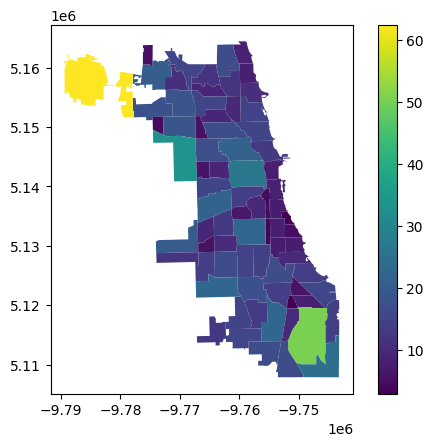

In [28]:
gdf.plot('area', legend=True)


In [29]:
gdf.explore('area', legend=False)


<Axes: >

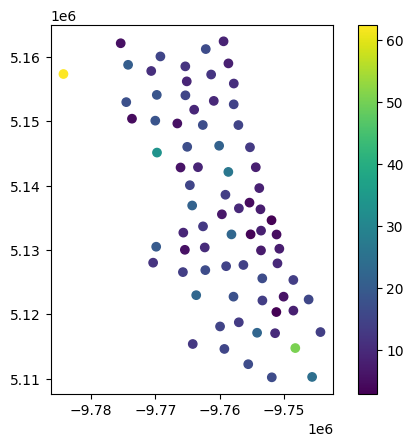

In [30]:
gdf = gdf.set_geometry('centroid')
gdf.plot('area', legend=True)


<Axes: >

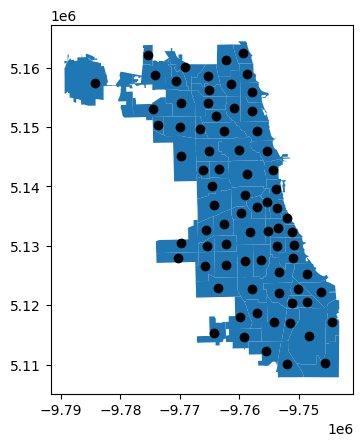

In [31]:
ax = gdf['geometry'].plot()
gdf['centroid'].plot(ax=ax, color='black')

Решение задач
--

In [32]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [33]:
path = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
gdf = geopandas.read_file(path)

In [34]:
gdf = gdf.to_crs('EPSG:2062')
gdf['area'] = gdf.area

In [36]:
from shapely.geometry import Point

sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam, crs=3857)
sagrada_fam = sagrada_fam.to_crs(epsg=2062)


In [37]:
gdf['centroid']=gdf.centroid

In [38]:
gdf['distance'] = gdf['centroid'].distance(Point(430000, 4600000))

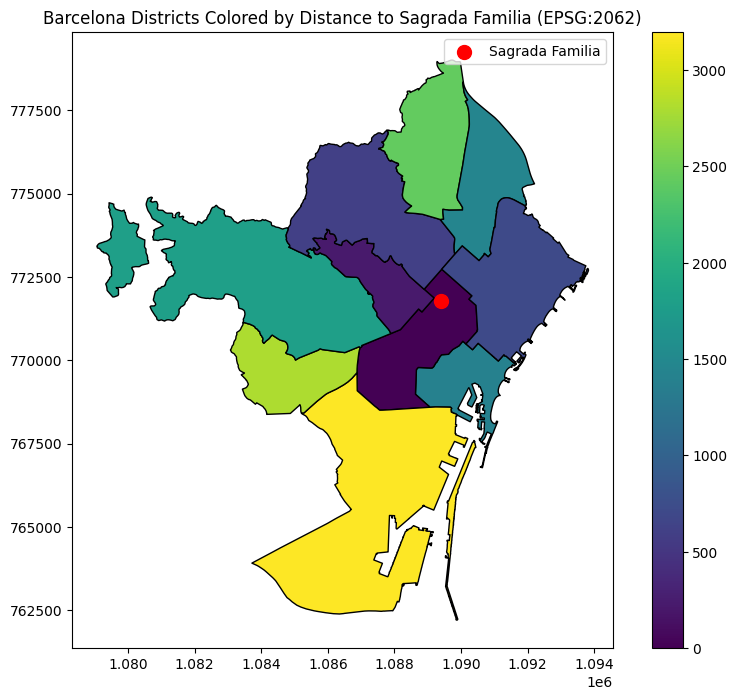

In [39]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from pyproj import CRS


path = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
gdf = gpd.read_file(path)

# Define the location of Sagrada Familia in WGS84 (EPSG:4326)
sagrada_fam_wgs84 = Point(2.1744, 41.4036)

# Reproject the GeoDataFrame to EPSG:2062
gdf = gdf.to_crs(epsg=2062)

# Reproject the Sagrada Familia point to EPSG:2062
sagrada_fam = gpd.GeoSeries([sagrada_fam_wgs84], crs="EPSG:4326").to_crs(epsg=2062).iloc[0]


gdf['distance_to_sagrada'] = gdf.geometry.distance(sagrada_fam)

# Plot the districts colored by their distance to Sagrada Familia
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    column='distance_to_sagrada',
    cmap='viridis',  # Choose a colormap
    legend=True,
    edgecolor='black',
    ax=ax
)

# Overlay the Sagrada Familia point
ax.scatter(sagrada_fam.x, sagrada_fam.y, color='red', marker='o', s=100, label='Sagrada Familia')

# Add labels, title, and legend
ax.set_title('Barcelona Districts Colored by Distance to Sagrada Familia (EPSG:2062)')
ax.legend()
plt.show()


In [43]:
import folium

In [46]:
gdf.head()

ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT          ELEM_DESCR  ... VALOR1QGIS  \
0   01041201  Districte  0104120101  Límit de districte  ...          0   
1   01041201  Districte  0104120101  Límit de districte  ...          0   
2   01041201  Districte  0104120101  Límit de districte  ...          0   
3   01041201  Districte  0104120101  Límit de districte  ...          0   
4   01041201  Districte  0104120101  Límit de districte  ...          0   

  VALOR2QGIS COL_FARCIT FCOL_DESCR FHEX_COLOR COL_DESCR HEX_COLOR7  \
0          0          1      Negre    #000000     Negre    #000000   
1          0          1      Negre    #000000     Negre    #000000   
2          0          1      Negre    #000000     Negre    #000000   
3          0          1      Negre    #000000     Negre    #000000   
4          0          1      Negre    #000000     Negre    #000000   

                                            geometry distance_to_sagrada  \
0  POLYGON ((1090241.744 770405.596, 1090342.582 ...         1388.723472   
1  POLYGON ((1090448.237 771647.183, 1090453.694 ...            0.000000   
2  MULTIPOLYGON (((1087409.714 768620.322, 108747...         3197.469662   
3  POLYGON ((1083492.496 771129.964, 1083500.768 ...         2802.786893   
4  MULTIPOLYGON (((1080722.37 774743.807, 1080727...         1790.082827   

                         centroid  
0  POINT (1090083.871 769341.012)  
1  POINT (1088651.674 770409.974)  
2  POINT (1087284.958 765672.155)  
3  POINT (1084830.283 769641.619)  
4  POINT (1083668.091 772419.768)  

[5 rows x 49 columns]

In [59]:
data = {'name': ['Place A'],
        'sagrada': ['Yes'],
        'geometry': [Point(2.174, 41.403)]}

df_points = gpd.GeoDataFrame(data, geometry='geometry')

In [63]:
m = gdf.explore('distance_to_sagrada', legend=False)
m = df_points.explore(m = m,  color="red")
folium.LayerControl().add_to(m)
m